In [1]:
import os
import numpy as np
import sys
import h5py
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
ROOT_DIR = '../'
sys.path.insert(0, os.path.abspath(f'/{ROOT_DIR}/heart_rhythm_analysis/'))    # make repo root importable

from heart_rhythm_analysis.get_data.CapnoBaseETL import CapnoBaseETL
from heart_rhythm_analysis.get_data.MimicETL import MimicETL

bSetUpDB = True

In [2]:
def load_as_df(file_path, filename, store_signals=True, bPlot=True):
    h5_path = f"{file_path}/{filename}.h5"
    hf = h5py.File(h5_path, "r")

    rows = []
    for subj in hf.keys():
        subj_grp = hf[subj]
        for win_id in subj_grp.keys():
            win_grp = subj_grp[win_id]
            rec_id = win_grp.attrs['rec_id']
            label = win_grp.attrs['label']
            raw_ppg = win_grp["raw_ppg"][:]
            proc_ppg = win_grp["proc_ppg"][:]
            raw_ekg = win_grp["raw_ekg"][:]
            ekg_fs = win_grp.attrs["ekg_fs"]
            ppg_fs = win_grp.attrs["ppg_fs"]
            notes = win_grp.attrs["notes"]
            row_data = {
                "subject": subj,
                "window_id": win_id,
                "rec_id": rec_id,
                "label": label,
                "ppg_fs_out": ppg_fs,
                "ekg_fs_out": ekg_fs,
                "raw_len": len(raw_ppg),
                "proc_len": len(proc_ppg),
                "duration_raw_s": len(raw_ppg) / ppg_fs,
                "duration_proc_s": len(proc_ppg) / ppg_fs,
                "notes": notes
            }
            if store_signals:
                row_data["raw_ppg"] = raw_ppg
                row_data["proc_ppg"] = proc_ppg
                row_data["raw_ekg"] = raw_ekg            
            rows.append(row_data)

    df = pd.DataFrame(rows)
    print(f"\nTotal windows: {len(df)}")
    if bPlot:
        first = df.iloc[np.random.randint(0, len(df))]
        y = first["proc_ppg"]
        t = np.arange(len(y)) / first.ppg_fs_out
        notes = first['notes']
        
        print(notes)
        fig = plt.figure(figsize=(15,7))
        plt.subplot(211)
        plt.plot(t, y)
        plt.title(f"Subject {first.subject} – Window {first.window_id}\nfs={first.ppg_fs_out} Hz")
        plt.xlabel("Time [s]")
        plt.ylabel("Amplitude")

        plt.subplot(212)
        y = first["raw_ekg"]
        t = np.arange(len(y)) / first.ekg_fs_out
        plt.plot(t,y)
        plt.title(f"fs={first.ekg_fs_out} Hz")
        plt.tight_layout()
        plt.show()
    hf.close()
    return df

# Create Capno Dataset

In [ ]:
def main():
    root_path = os.path.join('../data/raw/capnobase/data/mat')
    out_path = os.path.join('../data/processed/length_full/capnobase_db')
    out_filename = 'capnobase_db'
    if not os.path.exists(out_path):
        os.mkdir(out_path)

    fs_in = 100.00
    fs_out = 100.00

    config = {
    "input_dir"      : root_path,
    "output_dir"     : out_path,
    "window_size_sec": 30,
    "fs_in"          : fs_in,
    "fs_out"   : fs_out,
    "lowpass_cutoff" : (fs_out / 2),
    "fir_numtaps"    : 129,
    "zero_phase"     : True,
    "out_filename" :  out_filename
}
    if bSetUpDB:
        etl = CapnoBaseETL(config)
        h5file = etl.process_all()
        print(f"Saved windows HDF5 to {h5file}")
    df = load_as_df(out_path,out_filename)

    display(df.head(10))
    return df
if __name__ == "__main__":
    df_capnobase = main()

# MIMIC III AF DATASET

In [ ]:

def main():
    root_path = os.path.join('../data/raw/mimic_af_nonaf/mimic_af_data.mat')
    out_filename = 'mimic_af_db'
    out_path = os.path.join('../data/processed/length_full/mimic_af_db')
    
    if not os.path.exists(out_path):
        os.mkdir(out_path)
    config = {
        "input_dir": root_path,
        "output_dir":  out_path,
        "fs_in": 125.00,
        "fs_out": 125.00,
        "window_size_sec": 30,
        "scale_type": "norm",
        "zero_phase": True,
        "decimate_signal": False,
        "out_filename": out_filename
    }
    # if bSetUpDB:
    #     etl = MimicETL(config)
    #     out_file = etl.process()
    #     print("Saved AF windows to", out_file)
    df = load_as_df(out_path,out_filename)
    display(df.head(10))
    return df

if __name__ == "__main__":
    df_mimc_af = main()
    

# MIMIC III Non-AF Dataset

In [ ]:

def main():
    root_path = os.path.join('../data/raw/mimic_af_nonaf/mimic_non_af_data.mat')
    out_filename = 'mimic_non_af_db'
    out_path = os.path.join('../data/processed/length_full/mimic_non_af_db')
    
    if not os.path.exists(out_path):
        os.mkdir(out_path)
    config = {
        "input_dir": root_path,
        "output_dir":  out_path,
        "fs_in": 125.00,
        "fs_out": 125.00,
        "window_size_sec": 30,
        "scale_type": None,
        "decimate_signal": False,
        "zero_phase": True,
        "out_filename": out_filename   
    }
    if bSetUpDB:
        etl = MimicETL(config)
        out_file = etl.process()
        print("Saved non AF windows to", out_file)
    df = load_as_df(out_path,out_filename)
    display(df.head(10))
    return df
if __name__ == "__main__":
    df_mimc_nonaf = main()

# MIMIC III General Subset

Loading ../data/raw/mimic3_data/mimic3_struct_output.mat
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
2

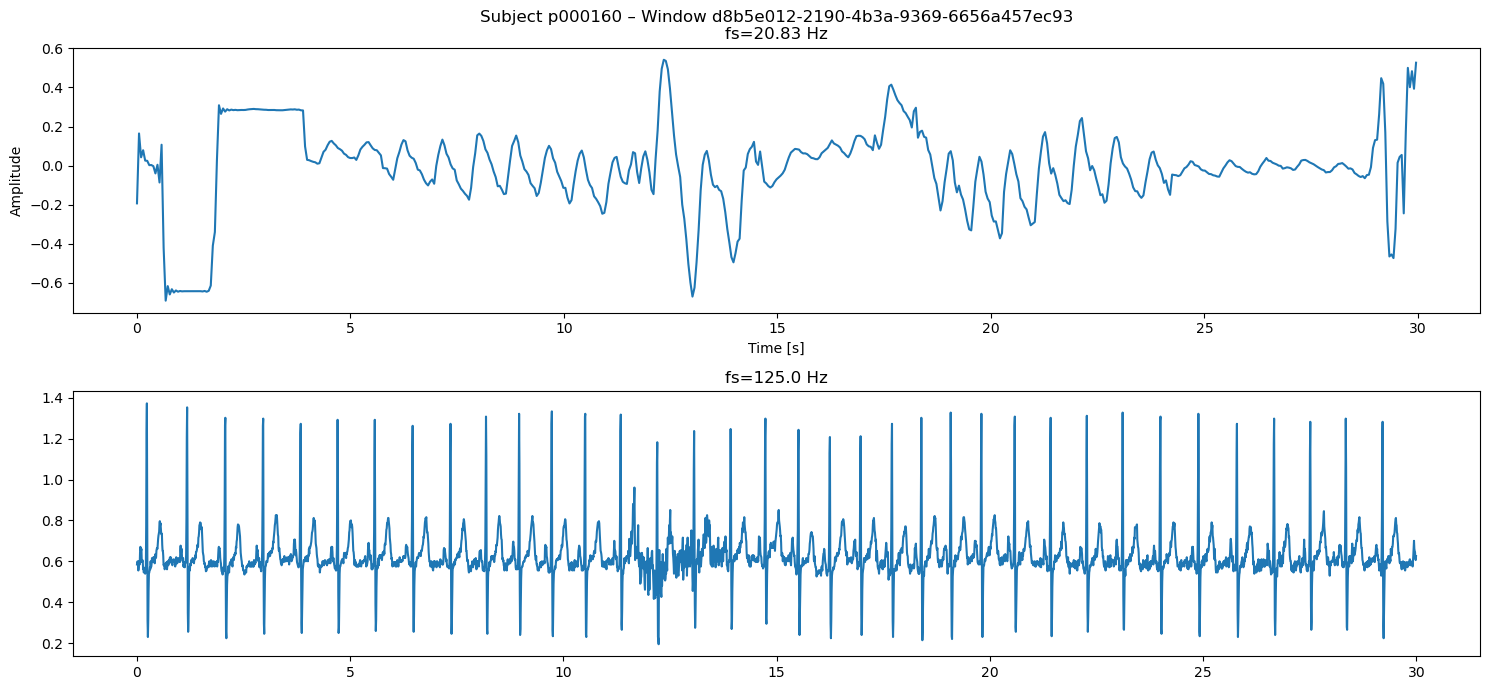

,subject,window_id,rec_id,label,ppg_fs_out,ekg_fs_out,raw_len,proc_len,duration_raw_s,duration_proc_s,notes,raw_ppg,proc_ppg,raw_ekg
0,p000107,02cea131-7e4e-4d6a-ab5d-192782444c54,3860035_0031,-1,20.83,125.0,3750,625,180.028805,30.004801,,"[0.9647058823529412, 0.9803921568627451, 0.988...","[-0.0078091025, 0.47028, 0.34195012, 0.3658076...","[0.328125, 0.3046875, 0.2890625, 0.2890625, 0...."
1,p000107,0338a4ea-2d63-49e6-9d02-5f2540c96df2,3860035_0031,-1,20.83,125.0,3750,625,180.028805,30.004801,,"[0.6, 0.6, 0.6, 0.6, 0.6, 0.596078431372549, 0...","[-0.23624241, 0.1833753, 0.041089892, 0.053282...","[0.4609375, 0.4921875, 0.5, 0.5, 0.5, 0.515625..."
2,p000107,0778b3c2-da27-4918-b82c-b734dd3f05fd,3860035_0031,-1,20.83,125.0,3750,625,180.028805,30.004801,,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.15565225, 0.7179939, 0.61004025, 0.4569707,...","[0.296875, 0.296875, 0.296875, 0.3046875, 0.30..."
3,p000107,0c67e4c3-6735-4a2c-b2d8-4742aa65892e,3860035_0031,-1,20.83,125.0,3750,625,180.028805,30.004801,,"[0.21568627450980393, 0.20392156862745098, 0.1...","[-0.54284424, -0.44469655, -0.44907248, -0.295...","[0.375, 0.375, 0.375, 0.375, 0.375, 0.3828125,..."
4,p000107,10192068-7d0c-422b-919c-ea6dade8b7c3,3860035_0031,-1,20.83,125.0,3750,625,180.028805,30.004801,,"[0.36470588235294116, 0.3607843137254902, 0.35...","[-0.5820756, -0.2592887, -0.41616678, -0.43285...","[0.4375, 0.4296875, 0.4140625, 0.40625, 0.3984..."
5,p000107,11545351-543a-4be9-bbd7-e90460e564bf,3860035_0031,-1,20.83,125.0,3750,625,180.028805,30.004801,,"[0.6235294117647059, 0.6235294117647059, 0.619...","[-0.2624077, 0.22295856, 0.09748453, 0.1758079...","[0.2734375, 0.2890625, 0.3203125, 0.3359375, 0..."
6,p000107,138edf05-19df-4673-aea4-805537980308,3860035_0031,-1,20.83,125.0,3750,625,180.028805,30.004801,,"[0.8431372549019608, 0.8352941176470589, 0.827...","[-0.037518114, 0.3509534, 0.23040473, 0.292833...","[0.234375, 0.2421875, 0.25, 0.25, 0.2421875, 0..."
7,p000107,189e38ff-69f7-4d13-a29b-05bb9f3e66d9,3860035_0031,-1,20.83,125.0,3750,625,180.028805,30.004801,,"[0.3764705882352941, 0.3686274509803922, 0.364...","[-0.63525325, -0.2025626, -0.13067609, 0.10140...","[0.3515625, 0.34375, 0.3359375, 0.3359375, 0.3..."
8,p000107,190891c7-14c6-4c0c-b9c4-7ac560b02d45,3860035_0031,-1,20.83,125.0,3750,625,180.028805,30.004801,,"[0.6745098039215687, 0.6666666666666666, 0.658...","[-0.16782534, 0.19337684, -0.010642856, -0.044...","[0.2734375, 0.2734375, 0.28125, 0.28125, 0.289..."
9,p000107,23923b3a-2005-407c-98fe-bb1c69dc2d75,3860035_0031,-1,20.83,125.0,3750,625,180.028805,30.004801,,"[0.36470588235294116, 0.3607843137254902, 0.36...","[-0.58443815, -0.2153759, -0.16877225, 0.06204...","[0.328125, 0.328125, 0.3359375, 0.3359375, 0.3..."


In [3]:
def main():
    root_path = os.path.join('../data/raw/mimic3_data/mimic3_struct_output.mat')
    out_filename = 'mimic3_db'
    out_path = os.path.join('../data/processed/length_full/mimic3_db')
    
    if not os.path.exists(out_path):
        os.mkdir(out_path)
    config = {
        "input_dir": root_path,
        "output_dir":  out_path,
        "fs_in": 125.00,
        "fs_out": 20.83,
        "window_size_sec": 30,
        "scale_type": "norm",
        "decimate_signal": True,
        "zero_phase": True,
        "out_filename": out_filename 
    }
    bSetUpDB = True
    if bSetUpDB:
        etl = MimicETL(config)
        out_file = etl.process()
        print("Saved General MIMIC III windows to", out_file)
    df = load_as_df(out_path,out_filename)
    display(df.head(10))
    return df
if __name__ == "__main__":
    df_mimic_gen = main()

# MIMIC IV Data

Loading ../data/raw/mimic4_data/mimic4_struct.mat
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20.83
20

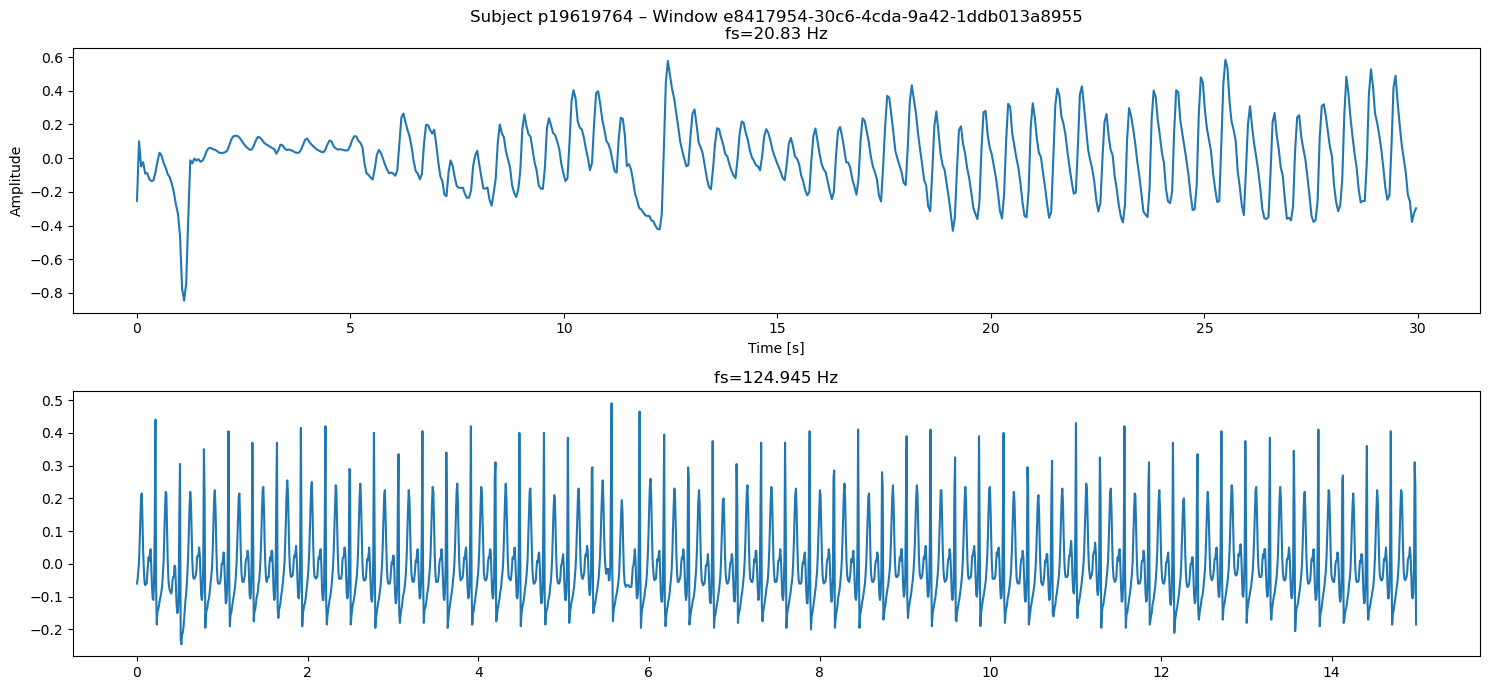

,subject,window_id,rec_id,label,ppg_fs_out,ekg_fs_out,raw_len,proc_len,duration_raw_s,duration_proc_s,notes,raw_ppg,proc_ppg,raw_ekg
0,p10020306,0adfb611-7100-41c7-9b72-a31987c6f604,83404654_0019,-1,20.83,124.945,1874,625,89.966395,30.004801,,"[0.4541015625, 0.44580078125, 0.4375, 0.428955...","[-0.51940167, -0.1082128, -0.2673344, -0.07551...","[-0.43, -0.41, -0.375, -0.35, -0.335, -0.31, -..."
1,p10020306,0efd1857-c371-4534-a2a1-e59448f528a2,83404654_0019,-1,20.83,124.945,1874,625,89.966395,30.004801,,"[0.44580078125, 0.44580078125, 0.441650390625,...","[-0.5465126, -0.08257908, -0.2963941, -0.27640...","[-0.015, -0.015, -0.015, 0.0, 0.01, 0.015, 0.1..."
2,p10020306,1038a62f-c0f2-451d-9e97-4a1852018dab,83404654_0019,-1,20.83,124.945,1874,625,89.966395,30.004801,,"[0.553955078125, 0.57080078125, 0.583251953125...","[-0.37420923, 0.11529419, -0.013807327, 0.0246...","[-0.055, -0.06, -0.065, -0.05, -0.045, -0.04, ..."
3,p10020306,13d4b181-bd18-4140-90ca-0675dc4b5fa7,83404654_0019,-1,20.83,124.945,1874,625,89.966395,30.004801,,"[0.57470703125, 0.567626953125, 0.560546875, 0...","[-0.45076016, 0.15774512, -0.10588804, -0.0530...","[-0.065, -0.06, -0.045, -0.04, -0.04, -0.04, -..."
4,p10020306,1458ce95-35b3-4e2d-90b5-66c877645ed9,83404654_0019,-1,20.83,124.945,1874,625,89.966395,30.004801,,"[0.670654296875, 0.69140625, 0.71240234375, 0....","[0.089095235, 0.5332592, 0.45843357, 0.5056904...","[0.485, 0.16, -0.085, -0.08, -0.09, -0.095, -0..."
5,p10020306,1b1d4c63-6f2e-407b-afff-eff3f8d63dc3,83404654_0019,-1,20.83,124.945,1874,625,89.966395,30.004801,,"[0.50341796875, 0.5, 0.5, 0.5, 0.50341796875, ...","[-0.44917557, -0.045499533, -0.12955156, -0.04...","[0.315, -0.105, -0.1, -0.105, -0.09, -0.09, -0..."
6,p10020306,23d35cce-447f-4147-8574-de13b37f06b4,83404654_0019,-1,20.83,124.945,1874,625,89.966395,30.004801,,"[0.66650390625, 0.658203125, 0.654052734375, 0...","[-0.16665557, 0.36750615, 0.15865755, 0.204687...","[-0.01, 0.015, 0.025, 0.04, 0.04, 0.05, 0.065,..."
7,p10020306,27127ccd-b878-4a5a-bb5d-ce43f7273d90,83404654_0019,-1,20.83,124.945,1874,625,89.966395,30.004801,,"[0.50830078125, 0.5, 0.5, 0.49560546875, 0.487...","[-0.48999786, 0.0947181, -0.14061144, -0.11820...","[-0.07, -0.06, -0.055, -0.05, -0.05, -0.035, -..."
8,p10020306,2a10e13c-c0c5-44cb-a1b8-f28efaafe17f,83404654_0019,-1,20.83,124.945,1874,625,89.966395,30.004801,,"[0.708251953125, 0.708251953125, 0.7041015625,...","[-0.13294566, 0.5885029, 0.33483702, 0.4136168...","[-0.02, -0.015, -0.02, -0.03, -0.015, 0.0, 0.0..."
9,p10020306,2bb9531b-97dd-4cde-9c36-f334b4d46b9e,83404654_0019,-1,20.83,124.945,1874,625,89.966395,30.004801,,"[0.553955078125, 0.5498046875, 0.54150390625, ...","[-0.34333163, 0.1428175, -0.03600666, 0.013858...","[-0.04, -0.005, 0.045, 0.085, 0.08, 0.07, 0.04..."


In [4]:
np.random.seed(42)
def main():
    substring = ''
    file_name = f'_{substring}' if len(substring) > 0 else ""
    root_path = os.path.join(f'../data/raw/mimic4_data/mimic4{file_name}_struct.mat')
    out_filename = f'mimic4{file_name}_db'
    out_path = os.path.join(f'../data/processed/length_full/{out_filename}')

    if not os.path.exists(out_path):
        os.mkdir(out_path)
    fs_in = 62.5
    fs_out = 20.83
    config = {
        "input_dir": root_path,
        "output_dir":  out_path,
        "fs_in": fs_in,
        "fs_out": fs_out,
        "window_size_sec": 30,
        "scale_type": "norm",
        "decimate_signal": True,
        "zero_phase": True,
        "out_filename": out_filename 
    }
    if bSetUpDB:
        etl = MimicETL(config)
        out_file = etl.process()
        print(f"Saved {substring} MIMIC IV  windows to", out_file)
    df = load_as_df(out_path,out_filename)
    display(df.head(10))
    return df
if __name__ == "__main__":
    df_mimic4_gen = main()


In [ ]:
df_capnobase['subject'].unique()
df_mimc_af['subject'].unique()
df_mimc_nonaf['subject'].unique()
df_mimic_gen['subject'].unique()
df_mimic4_gen['subject'].unique()

mimic3_non_af_subject_ids = (df_mimc_nonaf['subject'].unique().squeeze())
mimic3_af_subject_ids = (df_mimc_af['subject'].unique().squeeze())
mimic3_general_subject_ids = (df_mimic_gen['subject'].unique().squeeze())

all_mimic3_subjects = []
# all_mimic3_subjects.append(mimic3_non_af_subject_ids[:])
# all_mimic3_subjects.append(mimic3_af_subject_ids[:])
# all_mimic3_subjects.append(mimic3_general_subject_ids[:])
all_mimic3_subjects = np.concatenate((mimic3_non_af_subject_ids,mimic3_af_subject_ids,mimic3_general_subject_ids))
print(len(all_mimic3_subjects),len(np.unique(all_mimic3_subjects)),all_mimic3_subjects,)

In [ ]:
from heart_rhythm_analysis.get_data.prepare_dataset import split_and_save

ROOT_PATH = '../data/processed/length_full'
file_paths = [f"{ROOT_PATH}/mimic3_db/mimic3_db.h5", f"{ROOT_PATH}/mimic4_db/mimic4_db.h5"]
out_path = '../data/development_dataset/length_full'
train_path, test_path = split_and_save(file_paths, train_ratio=0.8, output_dir=out_path)